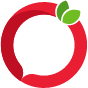

# Exploratory Analysis of Torob Search Data

Greetings and a warm welcome from Torob Data Team!

We are very excited to share with you the Torob's search data for the task of exploratory data analysis as part of OpenAI Summer School 2022. The data consists of users' search logs as well as their clicks on search results in Torob. It also includes information for a sample of the products and product categories. In this notebook, you will analyze this data and answer some questions with the goal of practicing your data analysis skills (especially the ability to work with Pandas) and also extract insightful information from our users' searches and their interaction with the search results.

Note that our original daily search data is very large (you may need gigabytes of RAM and disk space to handle the data of just one day!). So, for practical purposes and due to the size constraints, the original data has been sampled and reduced, and what you'll work with is just a small fraction of the data of one week. 

The sections marked with a triangular flag (🚩) are those which you need to read and answer. Allright, without further ado let's get started!

(NOTE: Here is the link to the guideline document of the project: https://docs.google.com/document/d/1r46gWcSXwvxxpS92cOqqA7pLuX1Vq673rokgwtnafb8/edit?usp=sharing)

---

## Import modules/libraries

So, as usual, we first need to import the neccessary libraries and modules which we would use:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%config Completer.use_jedi = False

---

## Load and Inspect Data

In this section we load the data from given files, and then we take a quick look at their structure and make sure they have been loaded properly.

### 🚩Load data from disk

First, we need to load the data from disk as Pandas dataframes. There are four different dataframes which need to be loaded:
- Search logs, stored in `search_logs.pkl`.
- Search click logs, stored in `search_click_logs.pkl`.
- Products info, stored in `products.pkl`.
- Product categories info, stored in `categories.pkl`.

Let's load them all and store each of them in a separate variable:

**Write the answer below:** \


In [2]:
search_logs_df = pd.read_pickle("data/search_logs.pkl")
search_click_logs_df= pd.read_pickle("data/search_click_logs.pkl")
products_df= pd.read_pickle("data/products.pkl")
categories_df= pd.read_pickle("data/categories.pkl")

### 🚩A quick peek at the data

To quickly get a feel of the strucure of the data and see if it has been loaded correctly, we can check the first few rows of the dataframes. Let's take a look at the first five rows of each dataframe we loaded in the previous step:

**Write the answer below:** \


In [3]:
search_logs_df.head()

,id,raw_query,result,datetime,category_id,user_id
0,qahft,سرویس ملامین نشکن,"[7840591, 1784875, 6716428, 6135112, 7103618, ...",2022-05-16 13:17:22.701000+00:00,NaN,MPOHZ
1,rxcka,جارو برقی,"[451703, 8801989, 8977506, 4665205, 5219768, 5...",2022-05-18 11:24:02.385000+00:00,4792.0,NZPJN
2,fnafq,دسته ps4,"[1457782, 5150503, 5921870, 909372, 9738201, 1...",2022-05-14 19:35:31.691000+00:00,NaN,NRMQA
3,ofpva,کلو تریمازول,"[404198, 812389, 339213, 929557, 3632184, 7764...",2022-05-14 18:20:55.328000+00:00,NaN,WRYZT
4,usiey,قرص فولی کوژن,"[8103652, 7283604, 4030781, 4756913, 3259566, ...",2022-05-13 19:50:03.519000+00:00,3196.0,TJLWU


In [4]:
search_click_logs_df.head()

,id,datetime,search_id,rank
0,jstyz,2022-05-13 19:30:14.030000+00:00,iitnm,1
1,ewusk,2022-05-13 19:30:24.290000+00:00,scjlb,2
2,osnio,2022-05-13 19:30:24.394000+00:00,ohuqq,6
3,expgi,2022-05-13 19:30:30.500000+00:00,pzrcn,3
4,srgdy,2022-05-13 19:30:32.884000+00:00,mhlmr,5


In [5]:
products_df.head()

,id,title,category_id
0,758287,میکروسکوپ سلسترون مدل 44121,262
1,7164195,دوربین عکاسی نیکون مدل Nikon D5600 body,1273
2,3242621,دوچرخه شهری قناری مدل Space Shuttle سایز 16,3882
3,4277974,دوچرخه سایز 16 مدل 2020 Flying Bear قناری,3882
4,8671305,دوچرخه 12 قناری مدل JENNY,4320


In [6]:
categories_df.head()

,title,id,parent_category_id
0,گوشی موبایل,2580,175.0
1,تبلت,9458,175.0
2,هدفون، هدست و هندزفری,1092,175.0
3,لوازم جانبی موبایل و تبلت,8192,175.0
4,قطعات موبایل و تبلت,3596,175.0


---

## Data Validation

Before starting our analysis, it's a good practice to validate the consistency of the data values and constraints with our expectations. There are various validity checks that could be done, and below we give you two examples.

### 🚩Validate uniquness of ID columns

For example, we can confirm whether all the unique ID columns (i.e. `id` column) have no duplicate values for all the dataframes we have. Let's check this for all the four dataframes:

**Write the answer below:**

In [7]:
print(search_click_logs_df["id"].duplicated().sum())
print(search_logs_df["id"].duplicated().sum())
print(products_df["id"].duplicated().sum())
print(categories_df["id"].duplicated().sum())

0
0
0
0


### 🚩Validate all the search clicks have a valid rank value

Here, we would like to check two things about the rank of search click records: 1) they have no NaN value, 2) they are all between 0 and 9 (because searches have at most 10 results). Let's do these checks:

**Write the answer below:**

In [8]:
print(search_click_logs_df["rank"].isna().sum())
print("---------------------")
print(search_click_logs_df[ (search_click_logs_df["rank"]<0) |  (search_click_logs_df["rank"]>9)])

0
---------------------
Empty DataFrame
Columns: [id, datetime, search_id, rank]
Index: []


---

## Exploratory Data Analysis (EDA)

Now that we have loaded the data, we are ready to start the processing and analysis of our data.

### 🚩Number of searches and search clicks

The most basic stat we can get from our data is the number of searches and search clicks we have. Let's find and print them:

**Write the answer below:**

In [9]:
print("number of searches :",search_logs_df.shape[0])
print("number of search clicks :",search_click_logs_df.shape[0])

number of searches : 539289
number of search clicks : 295692


### 🚩Number of unique search queries

We can also calculate the number of unique search queries.

**Write the answer below:**

In [10]:
search_logs_df["raw_query"].unique().shape[0]


260193

### 🚩Number of unique users

Another basic stat is the number of unique users who searched on Torob. We can use `user_id` column to calculate this:

**Write the answer below:**

In [11]:
search_logs_df["user_id"].unique().shape[0]

311083

### 🚩Most frequent search queries

We would like to know which search queries are the most popular (i.e. most frequent). We can use the "search logs" data to find the answer. Find the top 20 most searched queries along with their number of searches:

**Write the answer below:**

In [12]:
search_logs_df["raw_query"].value_counts()[:20]

iphone           7626
دلار امریکا      3240
کفش              3211
روغن             2956
لپ تاپ ایسوس     1940
دوربین عکاسی     1929
شیر              1781
دوچرخه 26        1689
xbox series s    1617
لباس عروس        1577
گوشی             1454
روغن موتور       1333
ماکروویو         1196
xiaomi 12 pro    1083
کاغذ a4          1012
تلویزیون          843
گوشی سامسونگ      812
دوچرخه            807
یخچال             789
روغن خوراکی       787
Name: raw_query, dtype: int64

### 🚩Distribution of length of search queries

We expect that the majority of search queries consist of at most three words. Let's confirm our expectation by calculating the number of words in each search query and then aggregate these values to see how the length of queries is distributed (i.e. find the distribution of number of words in search queries):

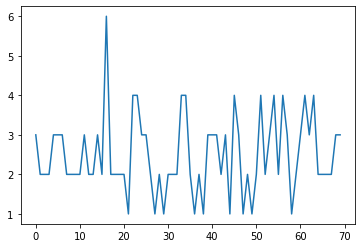

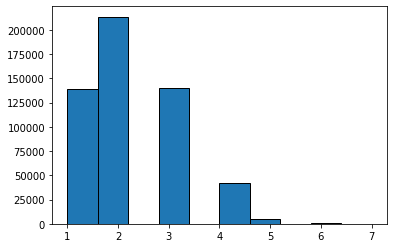

In [13]:
temp_list= [len(x.split()) for x in search_logs_df["raw_query"]]
plt.plot(temp_list[:70])
plt.show()
plt.hist(temp_list,edgecolor="black")
plt.show()

### 🚩Most common words in search queries

Which words were most commonly used in the search queries? Find the top 20 most common words along with their number of occurrences in search queries:

**Write the answer below:**  
(Hint: split + explode!!!)

In [14]:
from itertools import chain

words= [x.split() for x in search_logs_df["raw_query"]]
flatten = list(chain(*words))
unique,counts= np.unique(flatten,return_counts=True)
for i in range(0,20):
    print(str(i+1)+"-",unique[np.flip(np.argsort(counts))[i]])

1- گوشی
2- روغن
3- iphone
4- موتور
5- کفش
6- pro
7- دوچرخه
8- سامسونگ
9- لباس
10- ماشین
11- ساعت
12- پراید
13- کولر
14- ای
15- برقی
16- تاپ
17- مردانه
18- یخچال
19- دوربین
20- زنانه


### 🚩Localize date and time values

Currently, the date & time values in the search and search-click dataframes are stored in UTC timezone. This is a best-pratice to store timestamp values in UTC when the data is stored in databases; however, for our next time-based analyses to be more understandable, we need to convert them all to Tehran timezone.

Convert and replace the `datetime` columns in both search and search-click dataframes:

In [15]:
search_logs_df["datetime"]=search_logs_df["datetime"].dt.tz_convert("Asia/Tehran")
search_click_logs_df["datetime"]=search_click_logs_df["datetime"].dt.tz_convert("Asia/Tehran")

### 🚩Number of searches and search-clicks per weekday

Now that we have converted the datetime to Tehran timezone, we are interested to know how many searches and search-clicks exist per weekday (i.e. Saturday, Sunday, Monday, etc.). We expect that both of these numbers to be a bit lower on weekends (i.e. Thursday and Friday).

Calculate the number of searches and search-clicks per weekday and plot both alongside each other in a single bar plot:

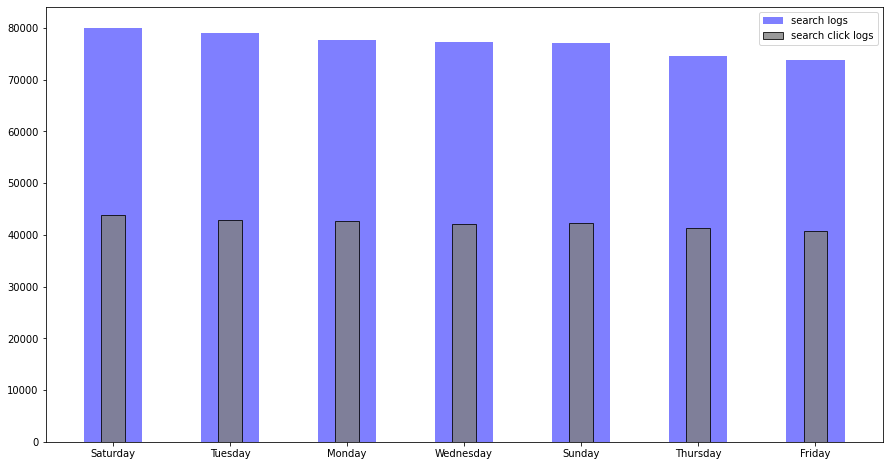

In [16]:
def getWeekDayStr(x):
    if(x==0):
        return "Monday"
    elif(x==1):
        return "Tuesday"
    elif(x==2):
        return "Wednesday"
    elif(x==3):
        return "Thursday"
    elif(x==4):
        return "Friday"
    elif(x==5):
        return "Saturday"
    elif(x==6):
        return "Sunday"
search_logs_df["weekday"]=search_logs_df["datetime"].dt.weekday.apply(lambda x:getWeekDayStr(x))
search_click_logs_df["weekday"]=search_click_logs_df["datetime"].dt.weekday.apply(lambda x:getWeekDayStr(x))
#
# print(search_logs_df["weekday"].value_counts())
# print("---------------------------------")
# print(search_click_logs_df["weekday"].value_counts())

fig, ax = plt.subplots(figsize =(15, 8))
plt.bar(search_logs_df["weekday"].value_counts().index,search_logs_df["weekday"].value_counts().values,color="blue",width=0.5,label="search logs",alpha=0.5)
plt.bar(search_click_logs_df["weekday"].value_counts().index,search_click_logs_df["weekday"].value_counts().values,color="grey",width=0.2,label="search click logs",alpha=0.8,edgecolor="black")
plt.legend()
plt.show()

### 🚩Number of searches and search-clicks per hour of day

Next, we would like to know which hour during the day has the most search traffic.

Calculate the number of searches and search-clicks per hour and plot both alongside each other in a single bar plot (note that we are just interested in the hour regardless of the specific day; so the result should be aggregated based on hour **over all the days**):

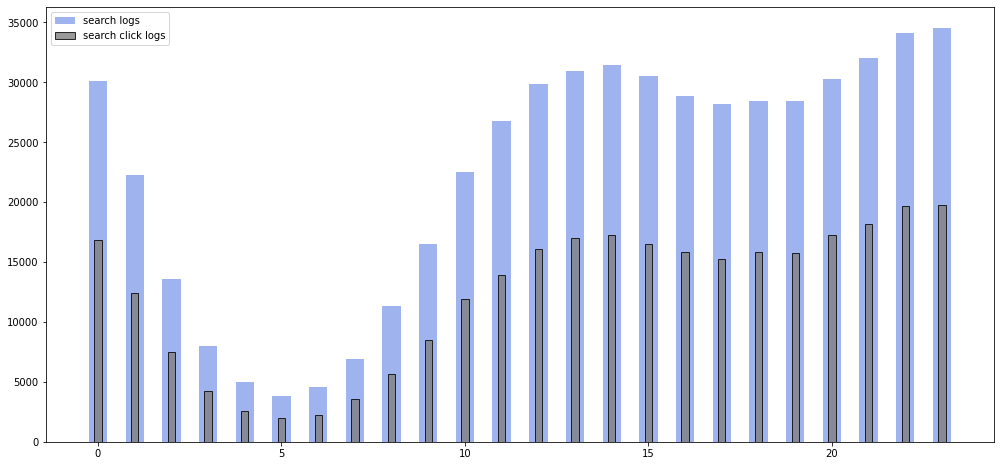

In [17]:
search_logs_df["hour"]=search_logs_df["datetime"].dt.hour
search_click_logs_df["hour"]=search_click_logs_df["datetime"].dt.hour

# print(search_logs_df["hour"].value_counts())
# print("---------------------------------")
# print(search_click_logs_df["hour"].value_counts())
plt.subplots(figsize =(17, 8))
plt.bar(search_logs_df["hour"].value_counts().index,search_logs_df["hour"].value_counts().values,color="royalblue",width=0.5,label="search logs",alpha=0.5)
plt.bar(search_click_logs_df["hour"].value_counts().index,search_click_logs_df["hour"].value_counts().values,color="grey",width=0.2,label="search click logs",alpha=0.8,edgecolor="black")
plt.legend()
plt.show()


### 🚩Top 10 most frequent search queries per weekday

Now, instead of calculating the most frequent queries over all the timeframe of the data, we would like to find the top 10 most frequent queries per weekday (note that we don't need the number of searches for each query; we are just interested in the queries themeselves).

**Write the answer below:**  

In [18]:
gp=search_logs_df.groupby(["weekday"])
for i in gp.groups:
    print(i)
    unique,counts= np.unique(gp.get_group(i)["raw_query"],return_counts=True)
    print(unique[np.argsort(counts)[-10:]])
    print("------------------------------------")


Friday
['روغن' 'کاغذ a4' 'لپ تاپ ایسوس' 'xiaomi 12 pro' 'دوربین عکاسی' 'شیر'
 'لباس عروس' 'کفش' 'دلار امریکا ' 'iphone']
------------------------------------
Monday
['کفش زنانه' 'شیر' 'xbox series s' 'دوربین عکاسی' 'لپ تاپ ایسوس'
 'روغن موتور' 'کفش' 'روغن' 'دوچرخه 26' 'iphone']
------------------------------------
Saturday
['کولر ابی' 'xbox series s' 'لپ تاپ ایسوس' 'مبل' 'دوربین عکاسی'
 'دوچرخه 26' 'روغن موتور' 'کفش' 'روغن' 'iphone']
------------------------------------
Sunday
['گوشی' 'xbox series s' 'دوربین عکاسی' 'لپ تاپ ایسوس' 'روغن موتور' 'کفش'
 'روغن' 'دوچرخه 26' 'روغن خوراکی' 'iphone']
------------------------------------
Thursday
['کاغذ a4' 'xiaomi 12 pro' 'دوربین عکاسی' 'لپ تاپ ایسوس' 'روغن' 'شیر'
 'لباس عروس' 'کفش' 'دلار امریکا ' 'iphone']
------------------------------------
Tuesday
['دوربین عکاسی' 'لپ تاپ ایسوس' 'کاغذ a4' 'xiaomi 12 pro' 'شیر' 'روغن'
 'لباس عروس' 'کفش' 'دلار امریکا ' 'iphone']
------------------------------------
Wednesday
['دوربین عکاسی' 'کاغذ a4' 'xiaomi 1

### 🚩Number of searches per user

Next, we would like to know how many of the searches are done by our regular visitors or loyal users.

Calculate the number of searches per user such that we could know the number of users with at most 3 searches, between 4 and 9 searches, and at least 10 searches.

**Write the answer below:**  

In [19]:
gp = search_logs_df.groupby("user_id").size()
less_than3=gp[gp<=3]
between4and9= gp[(gp>=4) & (gp<=9)]
at_least_10 = gp[gp>=10]
print(less_than3.shape[0])
print(between4and9.shape[0])
print(at_least_10.shape[0])

286513
22223
2347


### 🚩Number of searches with or without a category

For some of the searches, a product category is also selected by the user which limits the search results to only the products in the selected category. We would like to find the number of these searches and compare it against searches without category.

Calculate the number of searches with and without a selected category by users:

**Write the answer below:**  
(Hint: if `category_id` is `NaN` for a search record, it means that search was performed without selecting a category; and consider that Pandas is very NA-friendly and also has methods for detecting `NaN` values.)

In [20]:
print("searches without selected category:",search_logs_df[search_logs_df["category_id"].isnull()].shape[0])
print("searches with selected category:",search_logs_df[search_logs_df["category_id"].isnull()==False].shape[0])

searches without selected category: 410049
searches with selected category: 129240


### 🚩Most frequent search queries among searches with a category

This is the same as the earlier exercise for finding the most frequent search queries, but it only consider searches with a selected category by user.

Find the top 10 most frequent search queries among searches with a category, along with their number of searches:

**Write the answer below:**  

In [21]:
unique,counts=np.unique(search_logs_df[search_logs_df["category_id"].isnull()==False]["raw_query"],return_counts=True)
unique[np.argsort(counts)[-10:]]

array(['هارد', 'شیایومی', 'ps5', 'کولر', 'دوچرخه', 'موتور', 'یخچال',
       'تلویزیون', 'گوشی', 'روغن'], dtype=object)

### 🚩Distribution of search clicks over different ranks

Is it more likely that the users click on the top search results instead of the lower ranked results? To find out, we need to compute the distribution of search-clicks over different ranks (i.e. number of search-clicks per rank of the clicked product in the search result).

Plot the distribution of number of search-clicks over different ranks using a bar plot:

**Write the answer below:**  

<AxesSubplot:title={'center':'number of clicks per rank'}>

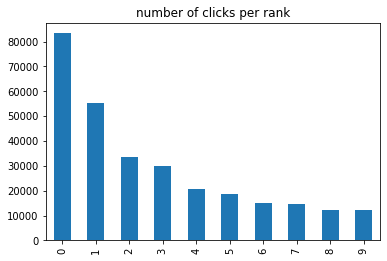

In [22]:
search_click_logs_df["rank"].value_counts().plot.bar(title="number of clicks per rank")

### 🚩Number of searches per number of search results

How many of the searches have zero search result? How many of them have only 1 or 2 results? To find out, we can compute the distribution of number of searches per number of search-results.

Calculate the full distribution of number of searches per number of search results:

**Write the answer below:**  

<AxesSubplot:title={'center':'number of searches per number of results'}>

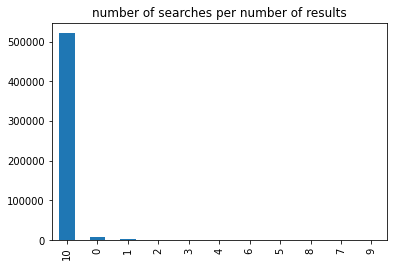

In [23]:
search_logs_df["number of search results"]=search_logs_df["result"].apply(lambda x:len(x))
search_logs_df["number of search results"].value_counts().plot.bar(title="number of searches per number of results")

### 🚩Most searched categories

Find the categories with the most of number of searches. We would like to know the ID of the categories as well as their **title**.

**Write the answer below:**  
(Hint: we can calculate the ID of most searched categories from "search logs" dataframe, but to find their title we should also use the "categories" dataframe; hence you probably need to perform a "join"/"merge" operation to combine the information from two dataframes.)

In [24]:

gp = search_logs_df.groupby("category_id")
df_temp = pd.DataFrame(index=range(len(gp.groups)))
df_temp["id"]=gp.groups
df_temp["number of searches"]=df_temp.id.apply(lambda x: gp.size().loc[x])
df_temp=pd.merge(df_temp,categories_df,on="id")
df_temp.sort_values(by=["number of searches"],ascending=False,inplace=True)
df_temp

,id,number of searches,title,parent_category_id
612,2580.0,14960,گوشی موبایل,175.0
717,3110.0,2647,روغن خوراکی,482.0
1975,8564.0,2170,لپ تاپ و نوت بوک,173.0
262,1092.0,2110,هدفون، هدست و هندزفری,175.0
195,820.0,2089,کارت گرافیک,240.0
...,...,...,...,...
2161,9328.0,1,شنا,1996.0
1941,8411.0,1,ابزار ماکت سازی,2944.0
1803,7708.0,1,سایر لوازم الکتریکی همراه,98.0
1493,6432.0,1,شبرنگ خودرو,585.0


### 🚩Number of clicks per searches

We would like to know how many of the searches have gotten no clicks, or how many of them have gotten more than one clicks. To find out, we should compute the distribution of number of clicks per searches:

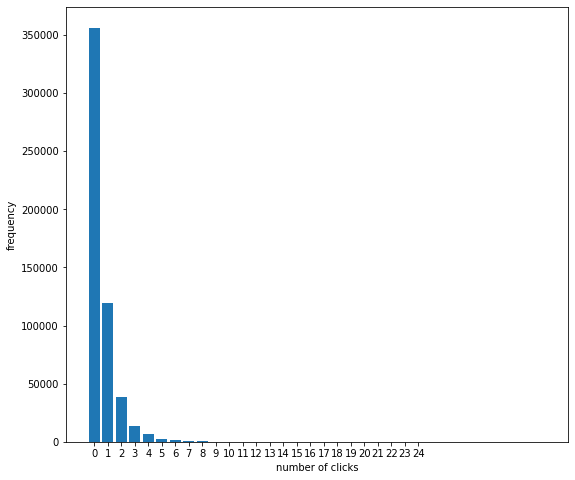

In [25]:
merged = pd.merge(search_click_logs_df,search_logs_df,right_on="id",left_on="search_id")
unique,counts=np.unique(merged.search_id.value_counts().values,return_counts=True)
unique=np.insert(unique,0,0)
counts=np.insert(counts,0,search_logs_df.shape[0]-sum((counts)))
plt.subplots(figsize =(9, 8))
plt.xlabel("number of clicks")
plt.ylabel("frequency")
plt.bar(unique,counts)
plt.xticks(range(len(counts)))
plt.show()



### 🚩Most clicked products

We are interested to know which product are the most popular. For that, we can count the clicks of each product and consider the most clicked products as the most popular ones. So let's find the top 20 most clicked products (we would like to know the ID, title and number of clicks for those products):

In [26]:
merged["selected_product_id"]=merged.apply(lambda x: x.result[x["rank"]],axis=1)
merged_products = pd.merge(merged,products_df,left_on="selected_product_id",right_on="id")
unique,counts=np.unique(merged["selected_product_id"],return_counts=True)
dfTemp = pd.DataFrame(index=range(20))
dfTemp["product_title"]=merged_products["title"].value_counts(ascending=True)[-20:].index
dfTemp["product_id"] = unique[np.argsort(counts)[-20:]]
dfTemp["number of clicks"]=np.sort(counts)[-20:]
dfTemp

,product_title,product_id,number of clicks
0,کنسول بازی سونی PlayStation 5 استاندارد,8625118,430
1,گوشی سامسونگ A52s 5G | حافظه 128 رم 8 گیگابایت,1078897,434
2,گوشی شیائومی POCO X3 Pro | حافظه 256 رم 8 گیگا...,253379,476
3,گوشی اپل (استوک) iPhone 11 | حافظه 128 گیگابایت,2566030,481
4,کنسول بازی مایکروسافت Xbox Series S | حافظه 51...,7315523,484
5,گوشی سامسونگ A52 | حافظه 128 رم 8 گیگابایت,2783029,494
6,گوشی شیائومی Redmi Note 11 Pro | حافظه 128 رم ...,5683508,513
7,گوشی سامسونگ A12 Nacho | حافظه 64 رم 4 گیگابایت,9193664,516
8,گوشی سامسونگ S22 Ultra 5G | حافظه 256 رم 12 گی...,6018876,540
9,گوشی اپل (استوک) iPhone 11 Pro | حافظه 256 گیگ...,9385946,553


### 🚩Most clicked categories

And finally, we would like to know which categories of the products have the most clicks. In other words, we would like to find out products of which categories have gotten the most clicks in total. Let's find the top 10 most clicked categories, including the ID and title of the categories as well as the total number of clicks for each of those categories:

In [27]:
merged_products_categories= pd.merge(merged_products,categories_df,left_on="category_id_y",right_on="id")
unique,counts=np.unique(merged_products_categories["category_id_y"],return_counts=True)
dfTemp=pd.DataFrame(index=range(10))
dfTemp["category_title"]=merged_products_categories["title_y"].value_counts(ascending=True)[-10:].index
dfTemp["id"]=unique[np.argsort(counts)[-10:]]
dfTemp["number of clicks"]=np.sort(counts)[-10:]
dfTemp

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17644\2825016111.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'id_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_products_categories= pd.merge(merged_products,categories_df,left_on="category_id_y",right_on="id")


,category_title,id,number of clicks
0,ماشین اصلاح و ریش‌ تراش,3064,2098
1,کتاب و مجلات,8197,2422
2,ساعت و مچ بند هوشمند,3424,2633
3,کارت گرافیک,820,2852
4,کیف و کاور گوشی,9663,2971
5,تلویزیون,2999,2978
6,لپ تاپ و نوت بوک,8564,4560
7,هدفون، هدست و هندزفری,1092,4986
8,روغن خوراکی,3110,7280
9,گوشی موبایل,2580,42518
